<h3>0.Import libraries</h3>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from datetime import datetime

<h2>1. Import Data</h2>

In [6]:
w_data = pd.read_csv("file:///C:/Users/HP/Downloads/weather%20(2).csv")

In [10]:
w_data = w_data.rename(columns = {
    'Data.Precipitation' : 'Precipitation',
    'Date.Full' : 'date',
    'Date.Month' : 'month',
    'Data.Temperature.Avg Temp' : 'Temp',
    'Date.Year' : 'Year',
    'Data.Wind.Direction' : 'windDirection',
    'Data.Wind.Speed' : 'windSpeed'
})

In [11]:
w_data

,Precipitation,date,month,Date.Week of,Year,Station.City,Station.Code,Station.Location,Station.State,Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,windDirection,windSpeed
0,0.00,2016-01-03,1,3,2016,Birmingham,BHM,"Birmingham, AL",Alabama,39,46,32,33,4.33
1,0.00,2016-01-03,1,3,2016,Huntsville,HSV,"Huntsville, AL",Alabama,39,47,31,32,3.86
2,0.16,2016-01-03,1,3,2016,Mobile,MOB,"Mobile, AL",Alabama,46,51,41,35,9.73
3,0.00,2016-01-03,1,3,2016,Montgomery,MGM,"Montgomery, AL",Alabama,45,52,38,32,6.86
4,0.01,2016-01-03,1,3,2016,Anchorage,ANC,"Anchorage, AK",Alaska,34,38,29,19,7.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16738,0.08,2017-01-01,1,1,2017,Casper,CPR,"Casper, WY",Wyoming,23,32,15,23,19.98
16739,0.00,2017-01-01,1,1,2017,Cheyenne,CYS,"Cheyenne, WY",Wyoming,32,42,21,26,15.16
16740,0.00,2017-01-01,1,1,2017,Lander,LND,"Lander, WY",Wyoming,17,29,4,26,1.65
16741,0.06,2017-01-01,1,1,2017,Rawlins,RWL,"Rawlins, WY",Wyoming,23,31,13,24,18.16


##  EDA

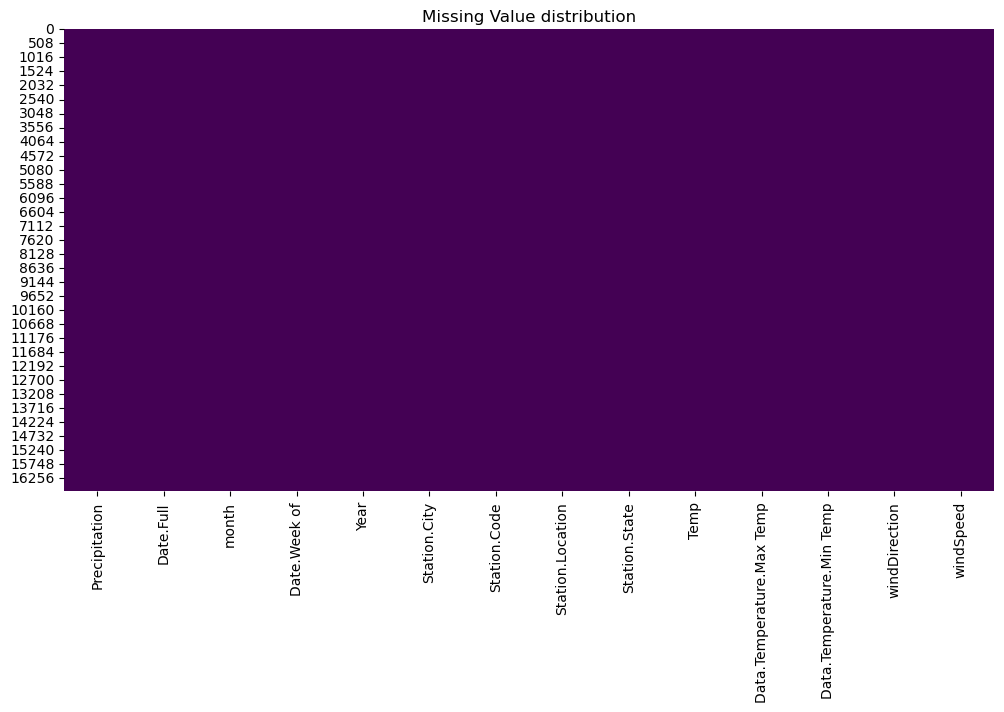

                           Missing Count  Percentage (%)
Precipitation                          0             0.0
Date.Full                              0             0.0
month                                  0             0.0
Date.Week of                           0             0.0
Year                                   0             0.0
Station.City                           0             0.0
Station.Code                           0             0.0
Station.Location                       0             0.0
Station.State                          0             0.0
Temp                                   0             0.0
Data.Temperature.Max Temp              0             0.0
Data.Temperature.Min Temp              0             0.0
windDirection                          0             0.0
windSpeed                              0             0.0


In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(w_data.isnull(), cbar = False, cmap= 'viridis')
plt.title('Missing Value distribution')
plt.show()

missing = w_data.isnull().sum().sort_values(ascending=False)
missing_perc = (missing / len(w_data))*100
print(pd.DataFrame({'Missing Count':missing, 'Percentage (%)': missing_perc}))

In [77]:
df = w_data.drop(["Station.City","Station.Location","Station.Code","Station.State"], axis=1)

df

,Precipitation,month,Date.Week of,Year,Temp,Data.Temperature.Max Temp,Data.Temperature.Min Temp,windDirection,windSpeed
date,,,,,,,,,
2016-01-03,0.00,1,3,2016,39,46,32,33,4.33
2016-01-03,0.00,1,3,2016,39,47,31,32,3.86
2016-01-03,0.16,1,3,2016,46,51,41,35,9.73
2016-01-03,0.00,1,3,2016,45,52,38,32,6.86
2016-01-03,0.01,1,3,2016,34,38,29,19,7.80
...,...,...,...,...,...,...,...,...,...
2017-01-01,0.08,1,1,2017,23,32,15,23,19.98
2017-01-01,0.00,1,1,2017,32,42,21,26,15.16
2017-01-01,0.00,1,1,2017,17,29,4,26,1.65


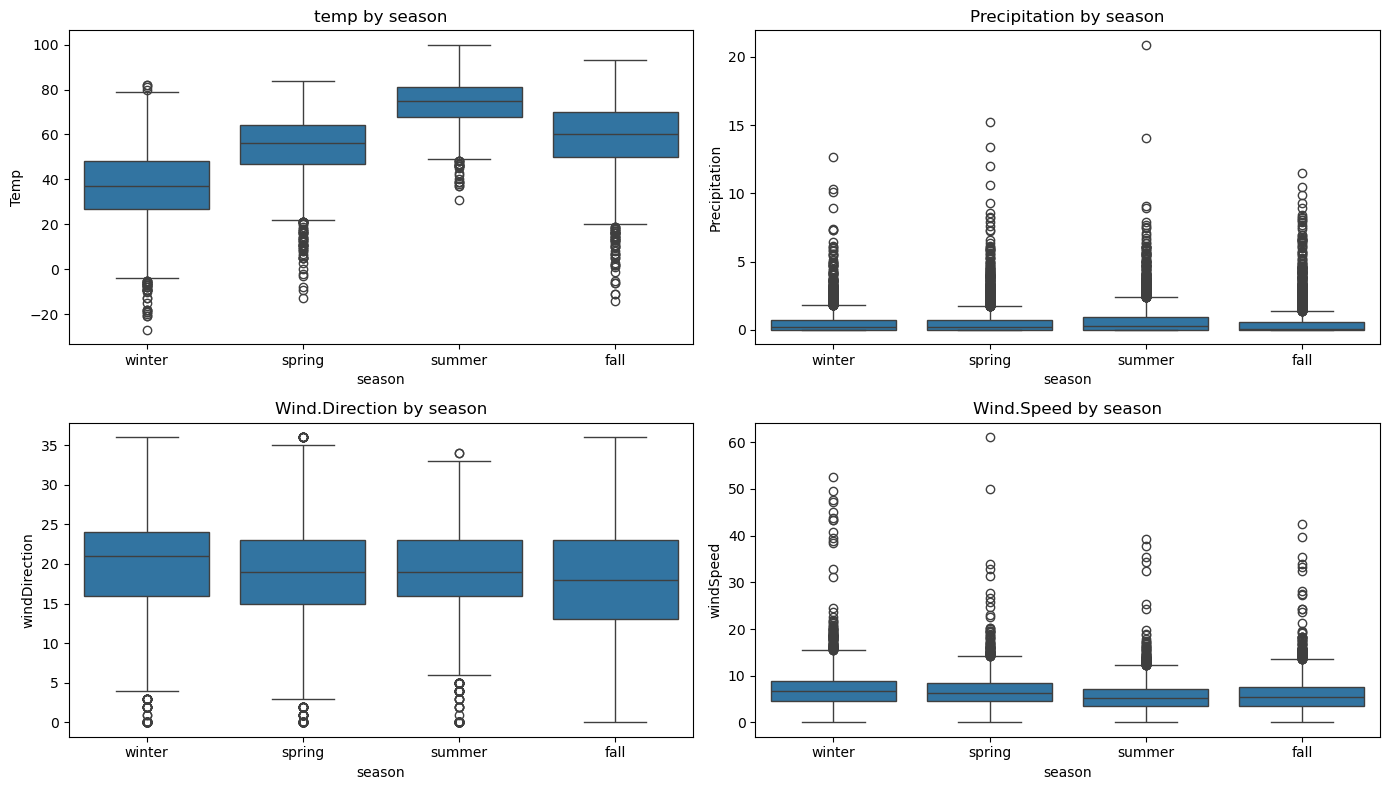

In [57]:
# SEASONAL PATTERN

plt.figure(figsize=(14,8))

plt.subplot(2, 2, 1)
sns.boxplot(x='season', y='Temp', data = w_data)
plt.title('temp by season')

plt.subplot(2, 2, 2)
sns.boxplot(x='season', y='Precipitation', data= w_data)
plt.title('Precipitation by season')

plt.subplot(2, 2, 3)
sns.boxplot(x='season', y='windDirection', data= w_data)
plt.title('Wind.Direction by season')

plt.subplot(2, 2, 4)
sns.boxplot(x='season', y='windSpeed', data= w_data)
plt.title('Wind.Speed by season')

plt.tight_layout()
plt.show()

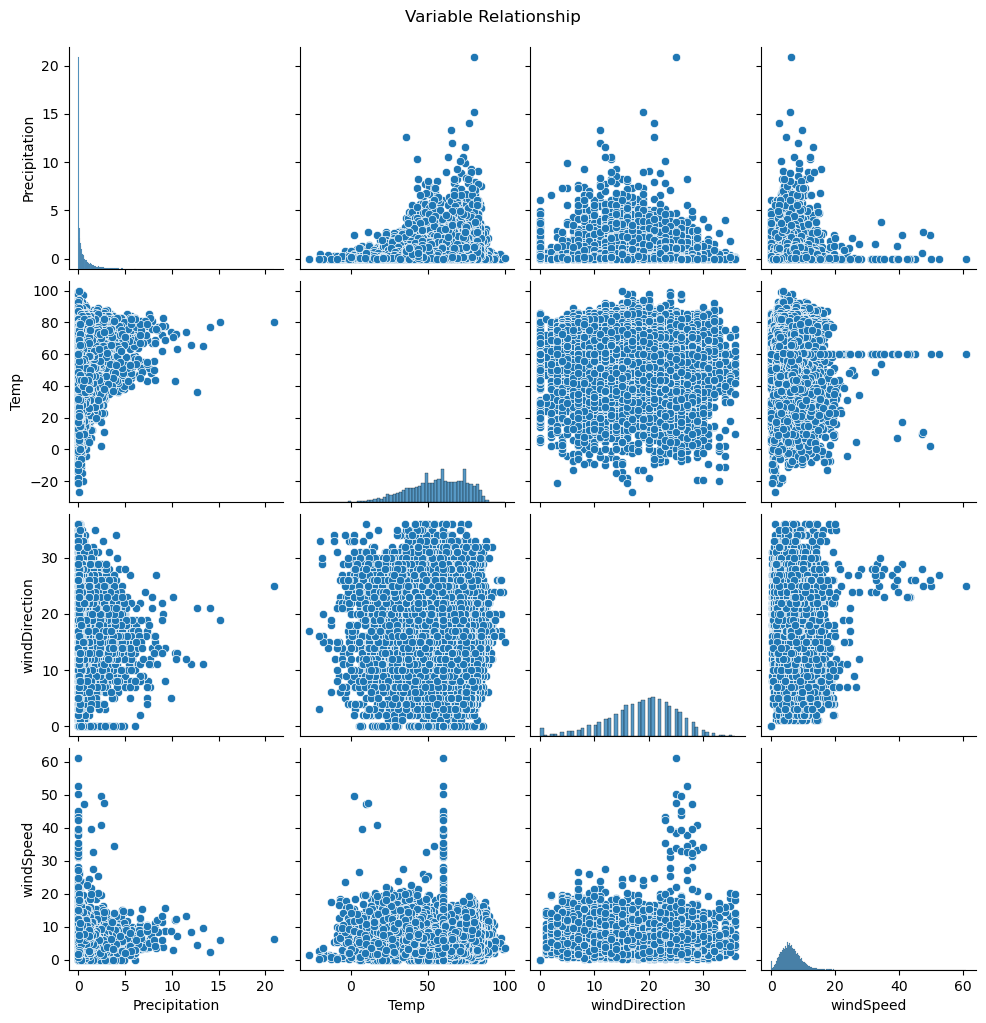

In [20]:
#reltionship between variables
#scatter
sns.pairplot(w_data[['Precipitation', 'Temp', 'windDirection', 'windSpeed']])
plt.suptitle('Variable Relationship', y=1.02)
plt.show()


## Model Training

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler
import joblib

In [79]:
df.dropna(inplace= True)
y= df['Temp']
X= df.drop(columns = ['Temp'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [84]:
model = GradientBoostingRegressor()
#model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

def evaluate(true, pred):
    print(f"MAE: {mean_absolute_error(true, pred):.2f}")
    print(f"RMSE:{np.sqrt(mean_squared_error(true, pred)):.2f}")
evaluate(y_test, y_pred)

MAE: 0.48
RMSE:1.04


#### Prediction

In [83]:
def predict_weather(input_dict):
    input_df = pd.DataFrame([input_dict])
    input_df = pd.get_dummies(input_df)
    # Align with training columns
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    return model.predict(input_df)[0]

In [86]:
import joblib
joblib.dump(model, "weather_model.joblib")

['weather_model.joblib']